# Maps from Vector Data Layers

It is common that we also want to produce maps using vector layers and we will now look at the functions RSGISLib provides for that. 

When dealing with vector data we will load the data using the geopandas (https://geopandas.org) module and pass the vector data to the RSGISLib functions as geopandas dataframes.


## Import Modules

In [1]:
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import rsgislib.tools.mapping

/var/folders/9p/p61100rs001_g5d8069gvzcm0000gn/T/ipykernel_50009/211074517.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


## Specify Input File Names

In [2]:
vec_file = "../data/gmw/gmw_v3_lyrs_sub.gpkg"
lyr_1996 = "mng_mjr_1996"
lyr_2007 = "mng_mjr_2007"
lyr_2008 = "mng_mjr_2008"
lyr_2009 = "mng_mjr_2009"
lyr_2010 = "mng_mjr_2010"
lyr_2015 = "mng_mjr_2015"
lyr_2016 = "mng_mjr_2016"
lyr_2017 = "mng_mjr_2017"
lyr_2018 = "mng_mjr_2018"
lyr_2019 = "mng_mjr_2019"
lyr_2020 = "mng_mjr_2020"

## Load Data Using Geopandas

In [3]:
gmw_1996_gdf = geopandas.read_file(vec_file, layer=lyr_1996)

Note, you can view the contents of the geopandas dataframe within a notebook. So if you want to check what attributes the vector layer has or something like that - although in this case there isn't much information attached. 

In [4]:
gmw_1996_gdf.head()

,PXLVAL,geometry
0,1,"POLYGON ((-62.48578 10.14000, -62.48578 10.139..."
1,1,"POLYGON ((-62.47400 10.10800, -62.47400 10.107..."
2,1,"POLYGON ((-62.47356 10.10689, -62.47356 10.106..."
3,1,"POLYGON ((-62.46444 10.08000, -62.46444 10.079..."
4,1,"POLYGON ((-62.46156 10.07333, -62.46156 10.073..."


## Create a Map using a Vector Layer

The process is largely the same as with raster datasets, in that the element rendering the map is matplotlib and the RSGISLib function is just adding information to the matplotlib plot:

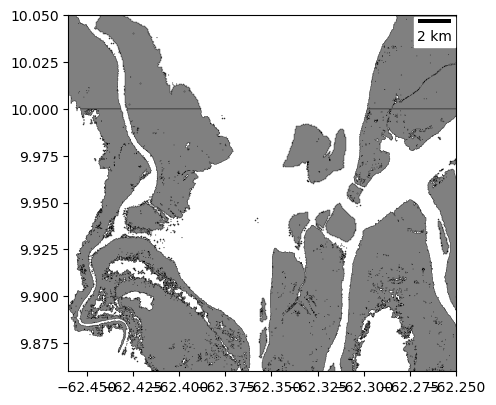

In [5]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(ax, gmw_1996_gdf, bbox)

The x-axis coordinates are overlapping one another which isn't very help, so lets sort that out:

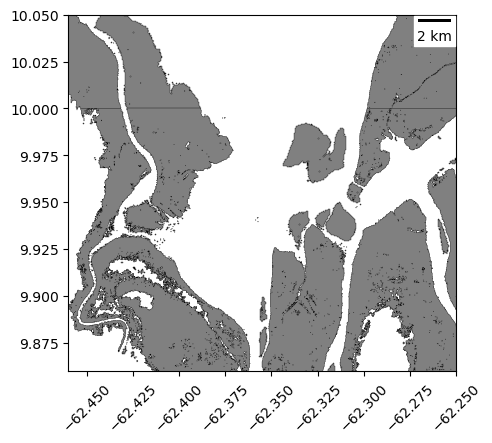

In [6]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(ax, gmw_1996_gdf, bbox)
ax.tick_params(axis="x", labelrotation=45)

## Let's change the colour of the polygons:

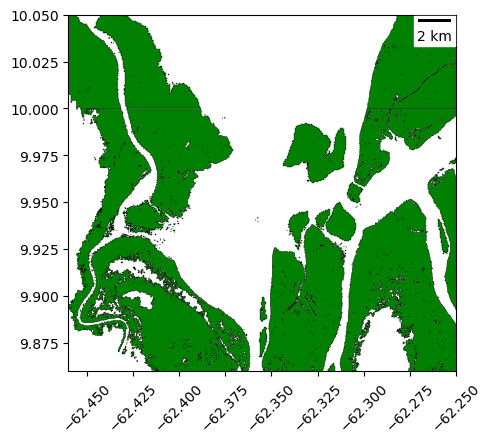

In [7]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(ax, gmw_1996_gdf, bbox, vec_fill_clrs="green")
ax.tick_params(axis="x", labelrotation=45)

I am a bit more fussy so I would like to specify the shade of green, I can therefore provide a hex colour string which you can find by using a colour picker (e.g., https://www.rapidtables.com/web/color/RGB_Color.html)

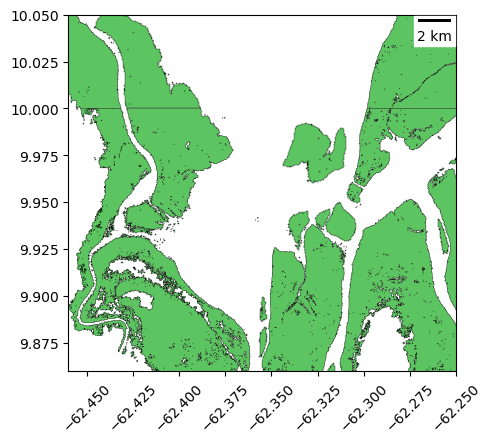

In [8]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax, gmw_1996_gdf, bbox, vec_fill_clrs="#5cc460"
)
ax.tick_params(axis="x", labelrotation=45)

## Change Line Colour:

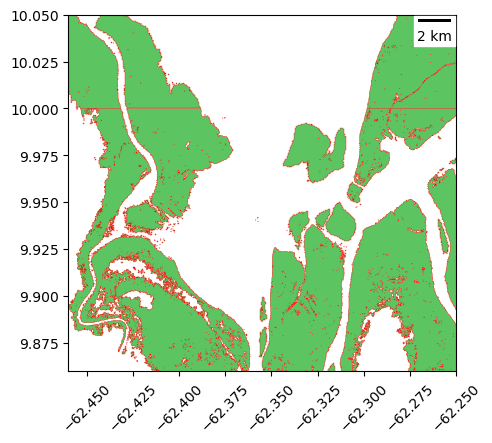

In [9]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax, gmw_1996_gdf, bbox, vec_fill_clrs="#5cc460", vec_line_clrs="red"
)
ax.tick_params(axis="x", labelrotation=45)

## Change Line Width:

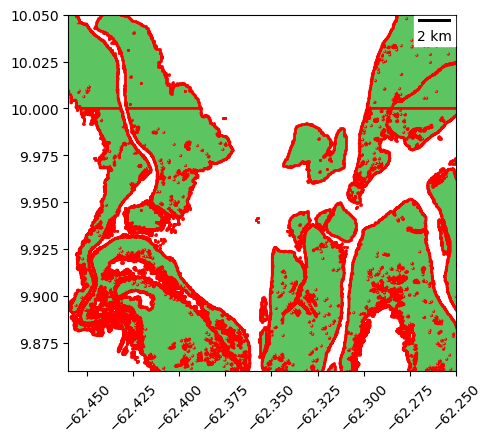

In [10]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_1996_gdf,
    bbox,
    vec_fill_clrs="#5cc460",
    vec_line_clrs="red",
    vec_line_widths=2,
)
ax.tick_params(axis="x", labelrotation=45)

## Remove lines from polygons:

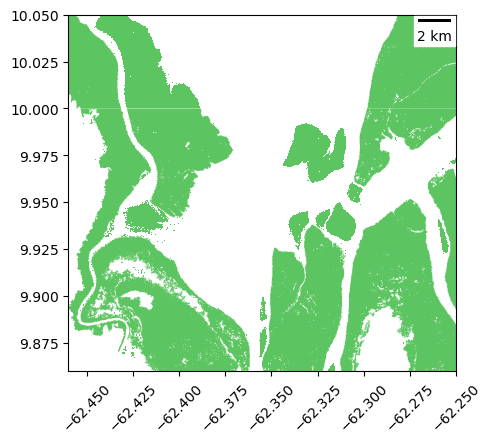

In [11]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_1996_gdf,
    bbox,
    vec_fill_clrs="#5cc460",
    vec_line_widths=0,  # defining the line with as 0 removes outlines
)
ax.tick_params(axis="x", labelrotation=45)

## Only Show Outlines

Now here we need to get geopandas to help us out, using the `boundary` option on a polygons vector layer returns a vector layer with just lines and therefore only the outlines will be displayed: 

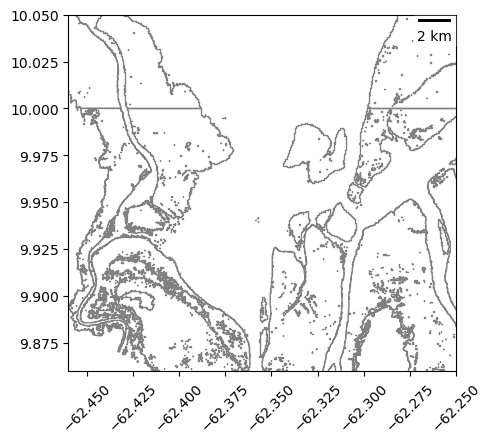

In [12]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_1996_gdf.boundary,
    bbox,
    vec_line_clrs="black",
    vec_line_widths=1,
)
ax.tick_params(axis="x", labelrotation=45)

## Multiple Layers on the Same Map

The `rsgislib.tools.mapping.create_vec_lyr_map` function also allows a list of geopandas dataframes to be passed and it will overlay those layers. 

First we need to open another GMW layer:

In [13]:
gmw_2020_gdf = geopandas.read_file(vec_file, layer=lyr_2020)

We can pass a list of geopandas dataframes but we need to also specify a list of colours so we can see the different layers:

Note, the order of the list will be the order in which the layers will be rendereds so in this same mangroves have expanded between 1996 and 2020 so we want to display the 2020 first and then the 1996 on top:

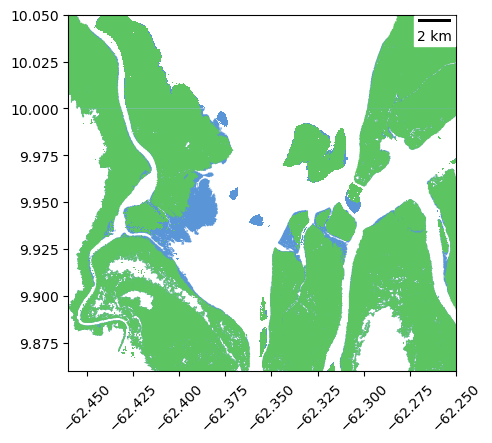

In [14]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    [gmw_2020_gdf, gmw_1996_gdf],
    bbox,
    vec_fill_clrs=["#5A95D8", "#5CC460"],
    vec_line_widths=0,
)
ax.tick_params(axis="x", labelrotation=45)

Below just illustrates providing the list of layers in both orders - you can then see both gain and loss between the two orders:

Text(0.5, 1.0, '1996, 2020')

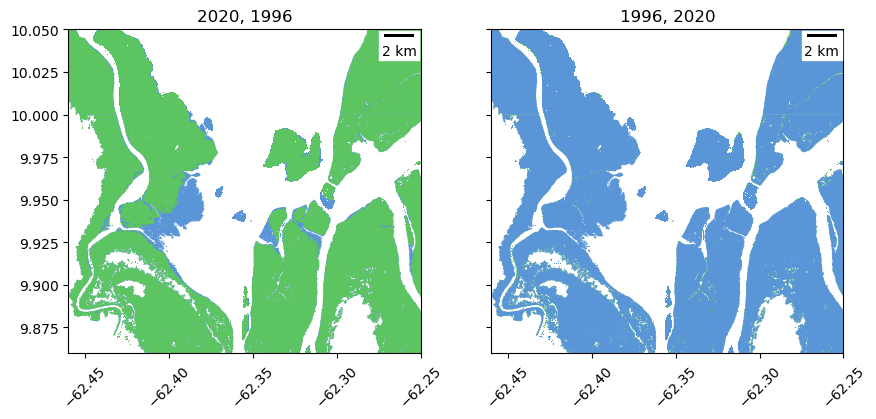

In [15]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

rsgislib.tools.mapping.create_vec_lyr_map(
    ax1,
    [gmw_2020_gdf, gmw_1996_gdf],
    bbox,
    vec_fill_clrs=["#5A95D8", "#5CC460"],
    vec_line_widths=0,
)
ax1.tick_params(axis="x", labelrotation=45)
ax1.set_title("2020, 1996")

rsgislib.tools.mapping.create_vec_lyr_map(
    ax2,
    [gmw_1996_gdf, gmw_2020_gdf],
    bbox,
    vec_fill_clrs=["#5CC460", "#5A95D8"],
    vec_line_widths=0,
)
ax2.tick_params(axis="x", labelrotation=45)
ax2.set_title("1996, 2020")

## Background Map - contextily

It is often useful to have some background mapping behind the vector layer, which should be some satellite imagery using the `rsgislib.tools.mapping.create_raster_img_map` function but we can also use other layers such as open street map and the contextily module (https://contextily.readthedocs.io) allows use to easily add such layers:


A list of all the layers available is here: https://contextily.readthedocs.io/en/latest/providers_deepdive.html

In [16]:
# We first need to import the contextily module 
import contextily

### Using the topographic open street map render:

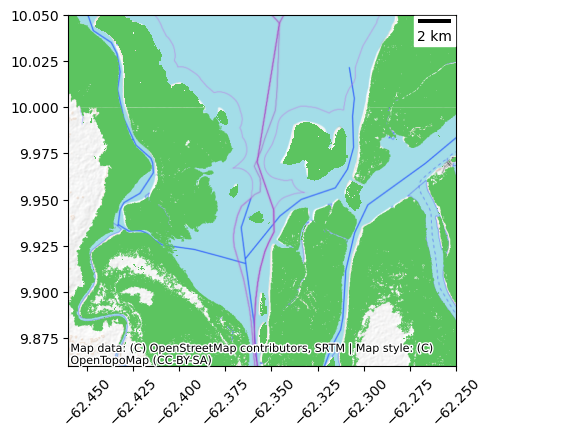

In [17]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_2020_gdf,
    bbox,
    vec_fill_clrs="#5CC460",
    vec_line_widths=0,
)
ax.tick_params(axis="x", labelrotation=45)

rsgislib.tools.mapping.add_contextily_basemap(
    ax, epsg_crs=4326, cx_src=contextily.providers.OpenTopoMap
)

### Changing the Copyright text

Sometimes the default contextily copyright string can be very long and make the map look untidy, we can therefore edit it:

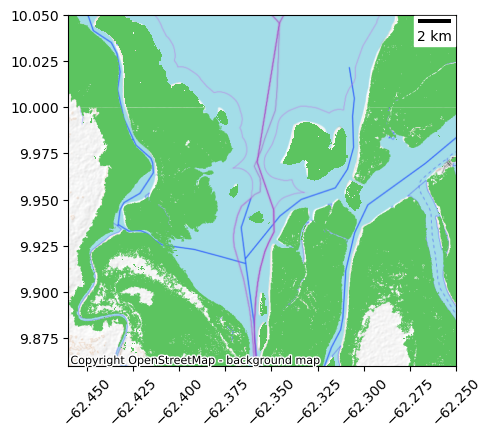

In [18]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_2020_gdf,
    bbox,
    vec_fill_clrs="#5CC460",
    vec_line_widths=0,
)
ax.tick_params(axis="x", labelrotation=45)

rsgislib.tools.mapping.add_contextily_basemap(
    ax, epsg_crs=4326, cx_src=contextily.providers.OpenTopoMap, cx_attribution="Copyright OpenStreetMap - background map"
)

Or remove it and put the copyright infomation to a figure caption:

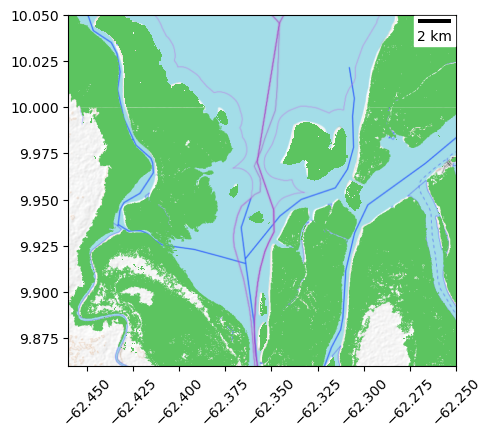

In [19]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_2020_gdf,
    bbox,
    vec_fill_clrs="#5CC460",
    vec_line_widths=0,
)
ax.tick_params(axis="x", labelrotation=45)

rsgislib.tools.mapping.add_contextily_basemap(
    ax, epsg_crs=4326, cx_src=contextily.providers.OpenTopoMap, cx_attribution=False
)

### Try a simpler background map

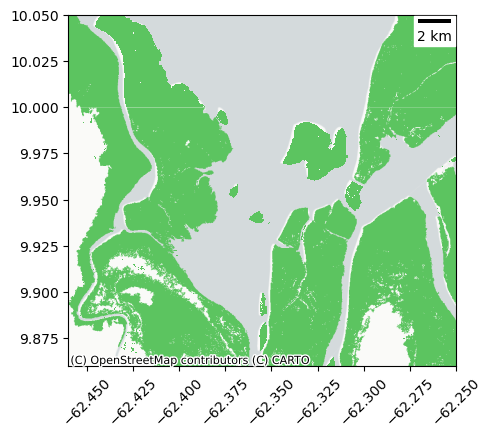

In [20]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_2020_gdf,
    bbox,
    vec_fill_clrs="#5CC460",
    vec_line_widths=0,
)
ax.tick_params(axis="x", labelrotation=45)

rsgislib.tools.mapping.add_contextily_basemap(
    ax, epsg_crs=4326, cx_src=contextily.providers.CartoDB.Positron
)


### Why not make the mangrove extent transparent 

In some cases it might be useful to have a layer be transparent or semi-transparent, for example to see a layer below, this can be done with the `vec_fill_alphas` variable:

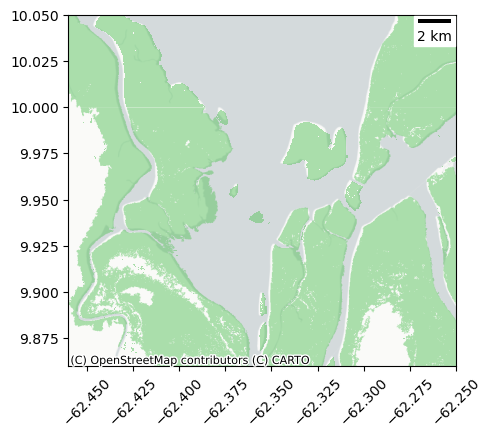

In [21]:
bbox = [-62.46, -62.25, 9.86, 10.05]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_vec_lyr_map(
    ax,
    gmw_2020_gdf,
    bbox,
    vec_fill_clrs="#5CC460",
    vec_line_widths=0,
    vec_fill_alphas=0.5,
)
ax.tick_params(axis="x", labelrotation=45)

rsgislib.tools.mapping.add_contextily_basemap(
    ax, epsg_crs=4326, cx_src=contextily.providers.CartoDB.Positron
)